In [2]:
import pandas as pd
import numpy as np
!conda install -c conda-forge folium=0.5.0 --yes
from geopy.geocoders import Nominatim
import folium
import requests # library to handle requests
from pandas.io.json import json_normalize 


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [6]:
address = 'San Isidro, PE'

geolocator = Nominatim(user_agent="pe_explorer")
location = geolocator.geocode(address)
latitudeSI = location.latitude
longitudeSI = location.longitude

address = 'Miraflores, PE'
location = geolocator.geocode(address)
latitudeMI = location.latitude
longitudeMI = location.longitude


address = 'Barranco, PE'
location = geolocator.geocode(address)
latitudeBA = location.latitude
longitudeBA = location.longitude

In [3]:
# @hidden_cell
CLIENT_ID = 'FIECQYONEVP4KPHBVPPNAQBEGQNMI5OXCQXRLBZULHIQXGRN' # your Foursquare ID
CLIENT_SECRET = 'ZNHYYGDWWKADFEFQMXQBOTFR44I0FV12NKULW2CKD1Z5LLG0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: FIECQYONEVP4KPHBVPPNAQBEGQNMI5OXCQXRLBZULHIQXGRN
CLIENT_SECRET:ZNHYYGDWWKADFEFQMXQBOTFR44I0FV12NKULW2CKD1Z5LLG0


In [7]:
radius=1000
LIMIT=500
lat=latitudeBA
lng=longitudeBA
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06374d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list=[]
venues_list.append([(
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue'].get("location").get("city")) for v in results])
nearby_venuesBA = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venuesBA.columns = ['id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Distrito']
nearby_venuesBA

,id,Venue,Venue Latitude,Venue Longitude,Venue Category,Distrito
0,5571fa2e498eb08a12a1c4a6,Pizerrìa La Linterna,-12.144713,-77.021933,Pizza Place,Barranco
1,4c002ea292a6c9287bcb43e2,Amoramar,-12.144075,-77.018201,Seafood Restaurant,Barranco
2,4bd644187b1876b0845e8c86,Sandwiches Monstruos,-12.141153,-77.021764,Sandwich Place,Barranco
3,53530299498eae3b9ab4a2a8,Belgicius,-12.141295,-77.021437,Belgian Restaurant,Lima
4,55f1cca8498e7a4cc0e1e86f,Canta Ranita,-12.146824,-77.021059,Seafood Restaurant,None
5,4beedd42e8c3c928fb449992,Chifa Chung Yion,-12.147327,-77.020927,Chinese Restaurant,Barranco
6,525c371c498ea05651a42be7,La Cuadra De Salvador,-12.141289,-77.022421,Steakhouse,Barranco
7,5489e5f6498e96b6cc511b7a,Isolina Taberna Peruana,-12.147665,-77.022290,Peruvian Restaurant,Lima
8,4f920892e4b03439aa9f9152,Sofá Café,-12.141347,-77.023240,Café,Barranco
9,4e3e444dd164b52911b88f2b,Sandwichería y Juguería Alejandro,-12.141245,-77.021197,Sandwich Place,Barranco


In [9]:
venuedetails=[]

for id in nearby_venuesBA["id"]:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id,CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()["response"]
    price=-1
    rating=-1
    if "price" in results["venue"]:
        price=results["venue"]["price"]["tier"]
    if "rating" in results["venue"]:
        rating=results["venue"]["rating"]
   
    venuedetails.append([
            id,
            price, 
            rating, 
            results["venue"]["likes"]["count"]])
detailsBA=pd.DataFrame(venuedetails)
detailsBA.columns=["id","pricetier","rating","likes"]
detailsBA.to_csv("detallesBA.csv")

In [12]:

from project_lib import Project
sc=""
project = Project(sc,"72772986-6e8d-4264-b2dd-b1bddb0f54a7","p-6ff084c337a47b71c84e3394452ec28fed26fa41")
project.save_data(file_name = "detallesBA.csv",data = detailsBA.to_csv(index=False))


{'file_name': 'detallesBA.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstone-donotdelete-pr-cdbniqnpmorunq',
 'asset_id': 'c5a02086-8105-4eb1-9bc5-836da1f6961f'}

In [13]:
lat=latitudeMI
lng=longitudeMI
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06374d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list=[]
venues_list.append([(
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue'].get("location").get("city")) for v in results])
nearby_venuesMI = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venuesMI.columns = ['id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Distrito']
nearby_venuesMI.head()

,id,Venue,Venue Latitude,Venue Longitude,Venue Category,Distrito
0,58e6b88c3ef0f614cebfe3df,Barra Maretazo,-12.122958,-77.027749,Seafood Restaurant,Lima
1,59015616e1f0aa5911fd731d,PAN Atelier,-12.121402,-77.028104,Bakery,Lima
2,4c08856bd4149c742a3661d5,Las Tejas,-12.122348,-77.027360,South American Restaurant,Miraflores
3,4d7af74c4755f04ddb21f424,Saqra,-12.123993,-77.027041,Peruvian Restaurant,Miraflores
4,5ba90ba5f870fd002ce5c265,Milenaria Café,-12.121453,-77.027694,Café,Lima


In [14]:
venuedetails=[]

for id in nearby_venuesMI["id"]:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id,CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()["response"]
    price=-1
    rating=-1
    likes=-1
    if "price" in results["venue"]:
        price=results["venue"]["price"]["tier"]
    if "rating" in results["venue"]:
        rating=results["venue"]["rating"]
    if "likes" in results["venue"]:
        likes=results["venue"]["likes"]["count"]
   
    venuedetails.append([
            id,
            price, 
            rating, 
            likes])
detailsMI=pd.DataFrame(venuedetails)
detailsMI.columns=["id","pricetier","rating","likes"]
project = Project(sc,"72772986-6e8d-4264-b2dd-b1bddb0f54a7","p-6ff084c337a47b71c84e3394452ec28fed26fa41")
project.save_data(file_name = "detallesMI.csv",data = detailsMI.to_csv(index=False))

{'file_name': 'detallesMI.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstone-donotdelete-pr-cdbniqnpmorunq',
 'asset_id': '39a13ff0-6a98-48e5-bff2-0cd6703b37ec'}

In [50]:
lat=latitudeSI
lng=longitudeSI
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06374d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list=[]
venues_list.append([(
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue'].get("location").get("city")) for v in results])
nearby_venuesSI = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venuesSI.columns = ['id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Distrito']
nearby_venuesSI.head()

,id,Venue,Venue Latitude,Venue Longitude,Venue Category,Distrito
0,4cc2f8474fcfbfb763bbbd24,Lima 27,-12.096252,-77.035084,Peruvian Restaurant,San Isidro
1,56d88b07498effe63b0b746e,Primos Chicken Lovers Bar,-12.098140,-77.036146,Restaurant,San Isidro
2,52fbaf6b498eb8a688516643,Astrid y Gastón,-12.096591,-77.034695,Peruvian Restaurant,San Isidro
3,4f15ff95e5e8f419abbd0465,Le Café,-12.097256,-77.037704,Peruvian Restaurant,Lima
4,4bd78d2a88559521c7e387a7,Tanta,-12.096798,-77.035334,Peruvian Restaurant,San Isidro


In [51]:
venuedetails=[]

for id in nearby_venuesSI["id"]:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id,CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()["response"]
    price=-1
    rating=-1
    likes=-1
    if "price" in results["venue"]:
        price=results["venue"]["price"]["tier"]
    if "rating" in results["venue"]:
        rating=results["venue"]["rating"]
    if "likes" in results["venue"]:
        likes=results["venue"]["likes"]["count"]
   
    venuedetails.append([
            id,
            price, 
            rating, 
            likes])
detailsSI=pd.DataFrame(venuedetails)
detailsSI.columns=["id","pricetier","rating","likes"]
project.save_data(file_name = "detallesSI.csv",data = detailsSI.to_csv(index=False),overwrite=True)

{'file_name': 'detallesSI.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstone-donotdelete-pr-cdbniqnpmorunq',
 'asset_id': '8ef921ba-c741-488d-be05-e98e38fa61ab'}

In [34]:
project.save_data(file_name = "detallesSI.csv",data = detailsSI.to_csv(index=False),overwrite=True)

{'file_name': 'detallesSI.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstone-donotdelete-pr-cdbniqnpmorunq',
 'asset_id': '8ef921ba-c741-488d-be05-e98e38fa61ab'}

In [265]:
venuesSI=nearby_venuesSI.merge(detailsSI)
venuesMI=nearby_venuesMI.merge(detailsMI)
venuesBA=nearby_venuesBA.merge(detailsBA)

In [266]:
venuesSI["Venue Category"]=venuesSI["Venue Category"].str.replace(" Restaurant","")
venuesMI["Venue Category"]=venuesMI["Venue Category"].str.replace(" Restaurant","")
venuesBA["Venue Category"]=venuesBA["Venue Category"].str.replace(" Restaurant","")

In [159]:
venuesSI[["pricetier","rating","likes","Venue Category"]].describe(include="all")

,pricetier,rating,likes,Venue Category
count,100.000000,100.00000,100.000000,100
unique,NaN,NaN,NaN,29
top,NaN,NaN,NaN,Peruvian
freq,NaN,NaN,NaN,14
mean,1.700000,7.73500,87.020000,NaN
std,1.058873,0.62286,117.004099,NaN
min,-1.000000,6.50000,5.000000,NaN
25%,1.000000,7.20000,11.750000,NaN
50%,2.000000,7.70000,40.500000,NaN
75%,2.000000,8.20000,99.000000,NaN


In [160]:
venuesMI[["pricetier","rating","likes","Venue Category"]].describe(include="all")

,pricetier,rating,likes,Venue Category
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,36
top,NaN,NaN,NaN,Peruvian
freq,NaN,NaN,NaN,13
mean,1.720000,8.067000,133.740000,NaN
std,0.792388,0.503333,203.997208,NaN
min,-1.000000,6.900000,4.000000,NaN
25%,1.000000,7.700000,23.000000,NaN
50%,2.000000,8.000000,53.500000,NaN
75%,2.000000,8.400000,149.750000,NaN


In [264]:
venuesBA[["pricetier","rating","likes","Venue Category"]].describe(include="all")

,pricetier,rating,likes,Venue Category
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,33
top,NaN,NaN,NaN,Peruvian
freq,NaN,NaN,NaN,12
mean,1.650000,7.271000,84.530000,NaN
std,0.845368,1.673519,146.671243,NaN
min,-1.000000,-1.000000,0.000000,NaN
25%,1.000000,6.900000,9.000000,NaN
50%,2.000000,7.450000,27.000000,NaN
75%,2.000000,8.125000,105.000000,NaN


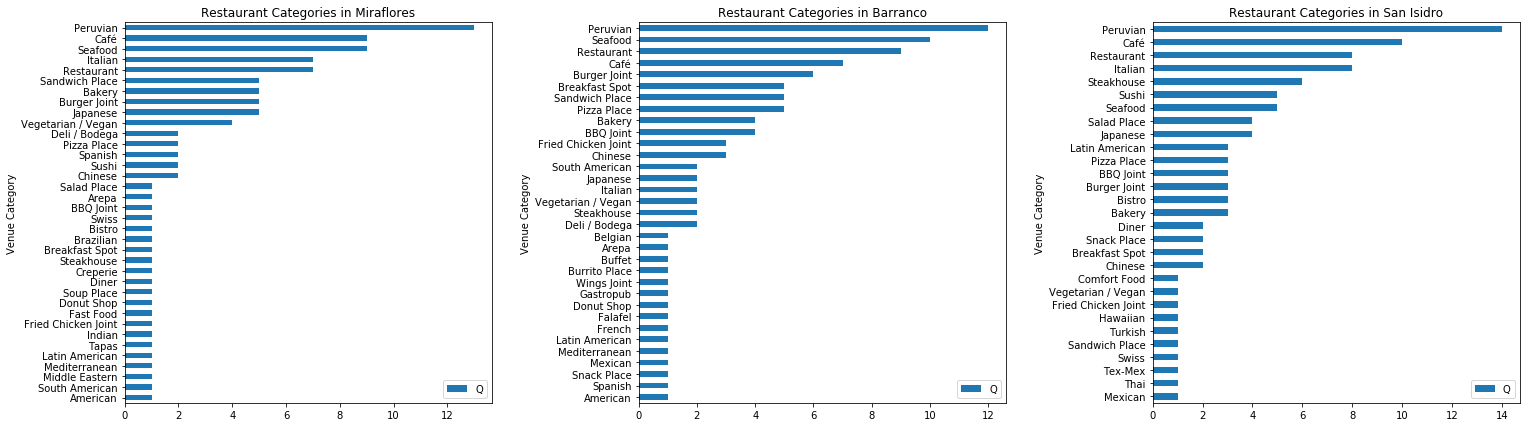

In [263]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,7)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


pd.DataFrame(venuesBA.groupby("Venue Category")["id"].count()).sort_values("id",ascending=True).plot(kind="barh",ax=ax1)
ax1.set_title("Restaurant Categories in Barranco")
ax1.legend(['Q'])

pd.DataFrame(venuesMI.groupby("Venue Category")["id"].count()).sort_values("id",ascending=True).plot(kind="barh",ax=ax0)
ax0.set_title("Restaurant Categories in Miraflores")
ax0.legend(['Q'])

pd.DataFrame(venuesSI.groupby("Venue Category")["id"].count()).sort_values("id",ascending=True).plot(kind="barh",ax=ax2)
ax2.set_title("Restaurant Categories in San Isidro")
ax2.legend(['Q'])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()


Text(0.5, 1.0, 'San Isidro price tier')

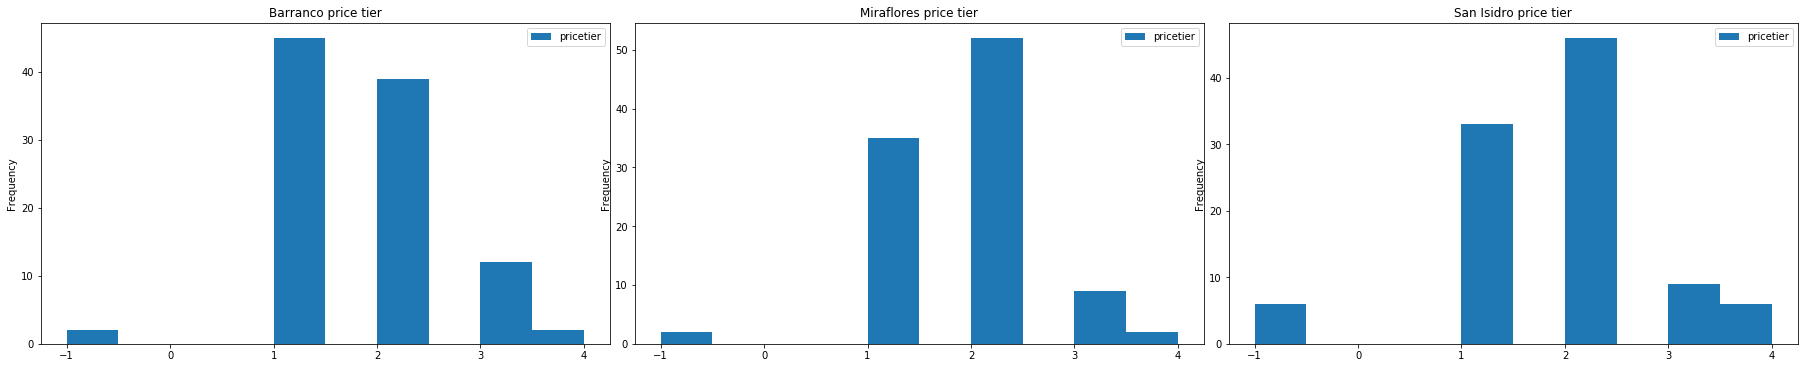

In [150]:
fig = plt.figure(figsize=(25,5)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

venuesBA[["pricetier"]].plot(kind="hist",ax=ax0)
ax0.set_title("Barranco price tier")
venuesMI[["pricetier"]].plot(kind="hist",ax=ax1)
ax1.set_title("Miraflores price tier")
venuesSI[["pricetier"]].plot(kind="hist",ax=ax2)
ax2.set_title("San Isidro price tier")


Text(0.5, 1.0, 'San Isidro Ratings')

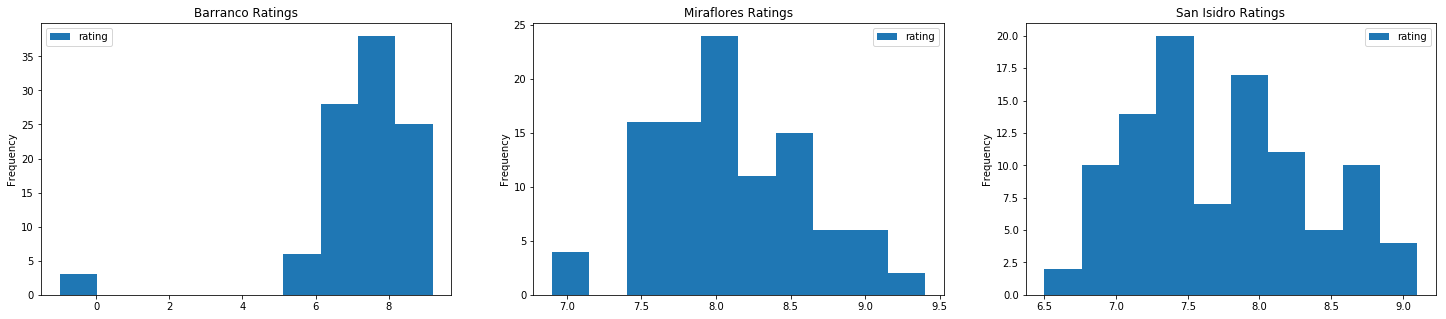

In [262]:
fig = plt.figure(figsize=(25,5)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
venuesBA[["rating"]].plot(kind="hist",ax=ax0)
ax0.set_title("Barranco Ratings")
venuesMI[["rating"]].plot(kind="hist",ax=ax1)
ax1.set_title("Miraflores Ratings")
venuesSI[["rating"]].plot(kind="hist",ax=ax2)
ax2.set_title("San Isidro Ratings")


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


Text(0.5, 1.0, 'San Isidro Likes')

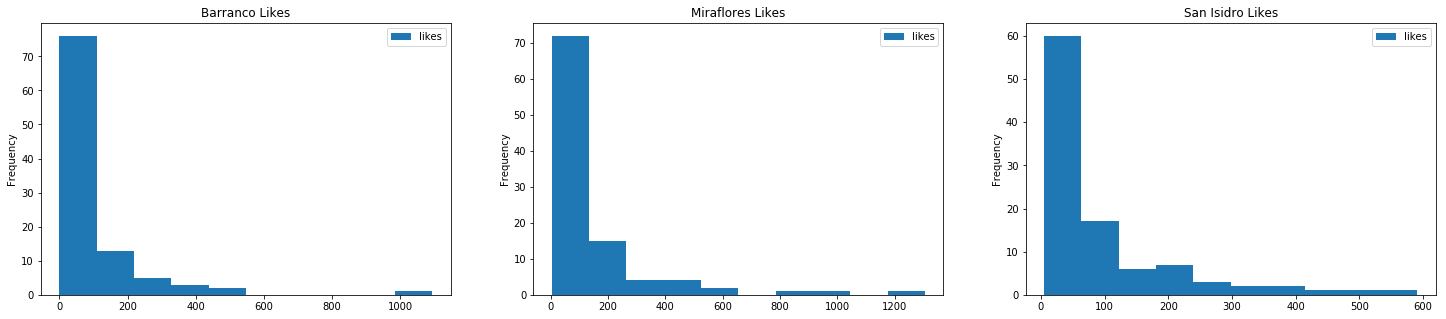

In [284]:
fig = plt.figure(figsize=(25,5)) # create figure

ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
venuesBA[["likes"]].plot(kind="hist",ax=ax0)
ax0.set_title("Barranco Likes")
venuesMI[["likes"]].plot(kind="hist",ax=ax1)
ax1.set_title("Miraflores Likes")
venuesSI[["likes"]].plot(kind="hist",ax=ax2)
ax2.set_title("San Isidro Likes")


In [293]:
SI_onehot = pd.get_dummies(venuesSI[['Venue Category']], prefix="", prefix_sep="")
SI_onehot['rating']=venuesSI['rating']
SI_onehot['likes']=venuesSI['likes']
SI_onehot['pricetier']=venuesSI['pricetier']

In [358]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
Clus_dataSet = SI_onehot
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
sklearn.utils.check_random_state(1000)
clusterNum = 3
distortions = []
K = range(2,15)
for k in K:
    k_means = KMeans( n_clusters = k)
    k_means.fit(Clus_dataSet)
    preds = k_means.predict(Clus_dataSet)
    silhouette = silhouette_score(Clus_dataSet,preds)
    distortions.append(silhouette)
labels = k_means.labels_
venuesSI["Cluster"]=labels

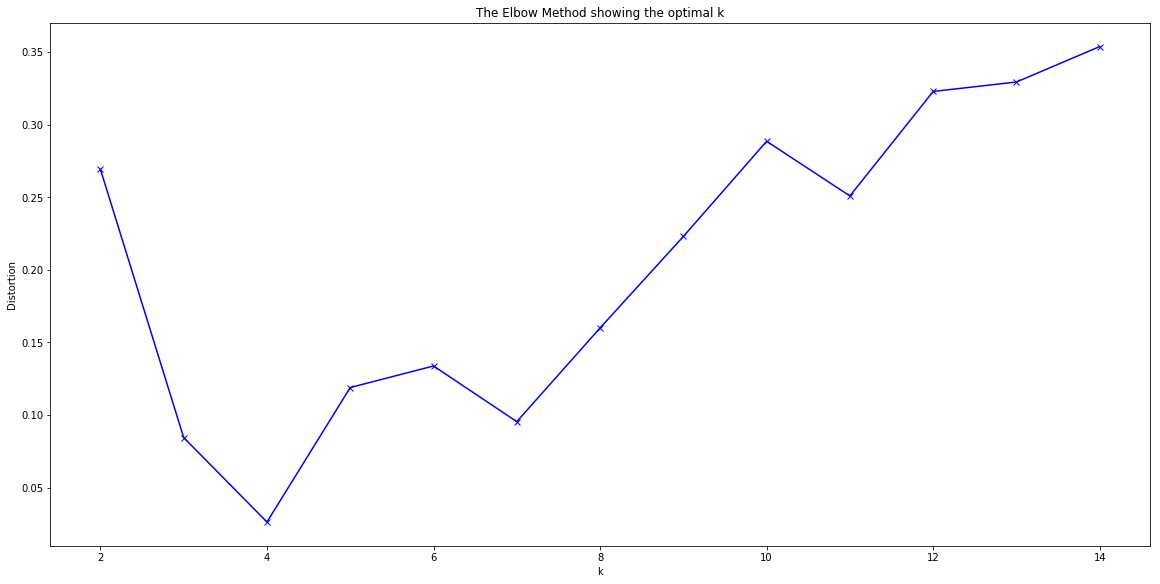

In [359]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [360]:
sklearn.utils.check_random_state(1000)
k_means = KMeans( n_clusters = 10)

k_means.fit(Clus_dataSet)
labels = k_means.labels_
venuesSI["Cluster"]=labels

In [363]:
venuesSI[venuesSI["Cluster"]==1]

,id,Venue,Venue Latitude,Venue Longitude,Venue Category,Distrito,pricetier,rating,likes,Clus_Db,Cluster
0,4cc2f8474fcfbfb763bbbd24,Lima 27,-12.096252,-77.035084,Peruvian,San Isidro,2,8.7,359,-1,1
2,52fbaf6b498eb8a688516643,Astrid y Gastón,-12.096591,-77.034695,Peruvian,San Isidro,3,8.6,526,-1,1
3,4f15ff95e5e8f419abbd0465,Le Café,-12.097256,-77.037704,Peruvian,Lima,2,9.0,14,-1,1
4,4bd78d2a88559521c7e387a7,Tanta,-12.096798,-77.035334,Peruvian,San Isidro,2,8.4,422,-1,1
5,4dab3fd7cda1652a2b9f3c6b,La Locanda,-12.097619,-77.038092,Peruvian,San Isidro,2,8.6,39,-1,1
6,567228ce498ed9ee60a72e39,Popolo Pizza,-12.099960,-77.036602,Pizza Place,Lima,1,8.4,41,-1,1
8,5bb03a44c0f163002c5c0745,Isidro Bistro Limeño,-12.094867,-77.036478,Peruvian,Lima,2,8.4,7,-1,1
9,4bd1e04ecaff9521ef88d1f0,Toshiro's Sushi Bar,-12.100372,-77.036886,Sushi,San Isidro,2,8.2,61,-1,1
12,542796b0498e07eb6c77fcb8,La Barra,-12.096436,-77.034667,Latin American,Lima,2,7.8,25,-1,1
15,4ca2bb0ad5a2a1434ca34390,Hanzo,-12.101997,-77.036961,Japanese,San Isidro,2,8.7,389,-1,1


In [373]:
MI_onehot = pd.get_dummies(venuesMI[['Venue Category']], prefix="", prefix_sep="")
MI_onehot['rating']=venuesMI['rating']
MI_onehot['likes']=venuesMI['likes']
MI_onehot['pricetier']=venuesMI['pricetier']
sklearn.utils.check_random_state(1000)
Clus_dataSet = MI_onehot
#Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
venuesMI["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [375]:
MI_onehot = pd.get_dummies(venuesMI[['Venue Category']], prefix="", prefix_sep="")
MI_onehot['rating']=venuesMI['rating']
MI_onehot['likes']=venuesMI['likes']
MI_onehot['pricetier']=venuesMI['pricetier']
sklearn.utils.check_random_state(1000)
Clus_dataSet = MI_onehot
Clus_dataSet.columns

Index(['American', 'Arepa', 'BBQ Joint', 'Bakery', 'Bistro', 'Brazilian',
       'Breakfast Spot', 'Burger Joint', 'Café', 'Chinese', 'Creperie',
       'Deli / Bodega', 'Diner', 'Donut Shop', 'Fast Food',
       'Fried Chicken Joint', 'Indian', 'Italian', 'Japanese',
       'Latin American', 'Mediterranean', 'Middle Eastern', 'Peruvian',
       'Pizza Place', 'Restaurant', 'Salad Place', 'Sandwich Place', 'Seafood',
       'Soup Place', 'South American', 'Spanish', 'Steakhouse', 'Sushi',
       'Swiss', 'Tapas', 'Vegetarian / Vegan', 'rating', 'likes', 'pricetier'],
      dtype='object')

In [243]:
SI_onehot = pd.get_dummies(venuesSI[['Venue Category']], prefix="", prefix_sep="")
SI_onehot['rating']=venuesSI['rating']
SI_onehot['likes']=venuesSI['likes']
SI_onehot['pricetier']=venuesSI['pricetier']
sklearn.utils.check_random_state(1000)
Clus_dataSet = SI_onehot
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
venuesSI["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

In [244]:
clusterNum


1